In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('airline_sentiment_analysis.csv')

In [3]:
data.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         11541 non-null  int64 
 1   airline_sentiment  11541 non-null  object
 2   text               11541 non-null  object
dtypes: int64(1), object(2)
memory usage: 270.6+ KB


In [5]:
data['text'][1]

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [6]:
data['length'] = data['text'].apply(len)

In [7]:
data.head()

,Unnamed: 0,airline_sentiment,text,length
0,1,positive,@VirginAmerica plus you've added commercials t...,72
1,3,negative,@VirginAmerica it's really aggressive to blast...,126
2,4,negative,@VirginAmerica and it's a really big bad thing...,55
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...,135
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX...",79


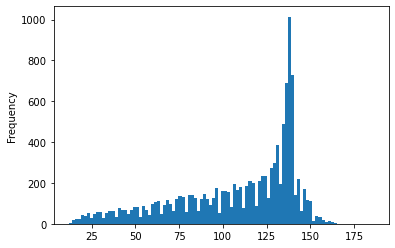

In [8]:
data['length'].plot(bins = 100, kind = 'hist')

In [9]:
data.length.describe()

count    11541.000000
mean       108.242613
std         34.582201
min         12.000000
25%         85.000000
50%        120.000000
75%        137.000000
max        186.000000
Name: length, dtype: float64

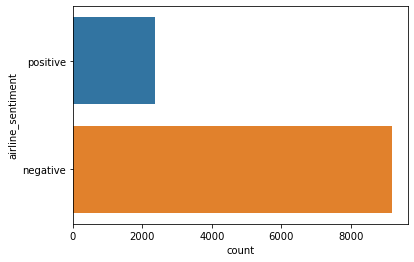

In [10]:
sns.countplot(y = 'airline_sentiment', data = data)

In [11]:
data_positive = data[data['airline_sentiment'] == 'positive']

In [12]:
data_negative = data[data['airline_sentiment'] == 'negative']

In [13]:
data_positive

,Unnamed: 0,airline_sentiment,text,length
0,1,positive,@VirginAmerica plus you've added commercials t...,72
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX...",79
5,8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D",47
6,9,positive,"@VirginAmerica it was amazing, and arrived an ...",80
7,11,positive,@VirginAmerica I &lt;3 pretty graphics. so muc...,83
...,...,...,...,...
11527,14623,positive,@AmericanAir Love the new planes for the JFK-L...,136
11529,14625,positive,@AmericanAir Flight 236 was great. Fantastic c...,106
11532,14628,positive,Thank you. “@AmericanAir: @jlhalldc Customer R...,118
11534,14630,positive,@AmericanAir Thanks! He is.,27


In [14]:
print('positive percentage review',(len(data_positive)/len(data) )*100)

positive percentage review 20.474828870981717


In [15]:
print('negative percentage review',(len(data_negative)/len(data) )*100)

negative percentage review 79.52517112901828


In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [18]:
def message_cleaning(message):
    test_punc_removed = [char   for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_stp = [word    for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english') ]
    return test_punc_removed_join_stp

In [32]:
data['label']=data['airline_sentiment'].replace({'negative': 0, 'positive': 1})
data.head()

,Unnamed: 0,airline_sentiment,text,length,label
0,1,positive,@VirginAmerica plus you've added commercials t...,72,1
1,3,negative,@VirginAmerica it's really aggressive to blast...,126,0
2,4,negative,@VirginAmerica and it's a really big bad thing...,55,0
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...,135,0
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX...",79,1


In [21]:
data_clean = data['text'].apply(message_cleaning)

In [22]:
data['text'][2]

"@VirginAmerica and it's a really big bad thing about it"

In [23]:
data_clean[2]

['VirginAmerica', 'really', 'big', 'bad', 'thing']

In [24]:
data.head()

,Unnamed: 0,airline_sentiment,text,length
0,1,positive,@VirginAmerica plus you've added commercials t...,72
1,3,negative,@VirginAmerica it's really aggressive to blast...,126
2,4,negative,@VirginAmerica and it's a really big bad thing...,55
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...,135
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX...",79


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
text_vectorizer = vectorizer.fit_transform(data['text'])

In [28]:
print(vectorizer.get_feature_names)

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer=<function message_cleaning at 0x0000028B85DF5280>)>


In [29]:
print(text_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
text_vectorizer.shape

(11541, 16483)

In [33]:
from sklearn.naive_bayes import MultinomialNB
NB_Classifier = MultinomialNB()
label = data['label'].values

In [34]:
NB_Classifier.fit(text_vectorizer,label)

MultinomialNB()

In [35]:
X = text_vectorizer
y = data['label']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [37]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

# Evaluation of the model

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
y_pred = NB_classifier.predict(X_train)

In [42]:
cm = confusion_matrix(y_train,y_pred)
cm

array([[7231,   85],
       [ 422, 1494]], dtype=int64)

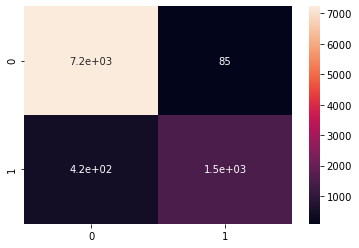

In [41]:
sns.heatmap(cm,annot = True)

In [47]:
y_pred_test = NB_classifier.predict(X_test)

In [48]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1937
           1       0.65      0.78      0.71       372

    accuracy                           0.90      2309
   macro avg       0.80      0.85      0.82      2309
weighted avg       0.91      0.90      0.90      2309



In [49]:
cm = confusion_matrix(y_test,y_pred_test)
cm

array([[1780,   82],
       [ 157,  290]], dtype=int64)

In [8]:
import requests
response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

200


In [9]:
print(response.json())

{'message': 'success', 'number': 7, 'people': [{'craft': 'ISS', 'name': 'Sergey Ryzhikov'}, {'craft': 'ISS', 'name': 'Kate Rubins'}, {'craft': 'ISS', 'name': 'Sergey Kud-Sverchkov'}, {'craft': 'ISS', 'name': 'Mike Hopkins'}, {'craft': 'ISS', 'name': 'Victor Glover'}, {'craft': 'ISS', 'name': 'Shannon Walker'}, {'craft': 'ISS', 'name': 'Soichi Noguchi'}]}


In [11]:
parameters = {
    "lat": 40.71,
    "lon": -74
}
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)

jprint(response.json())

{
    "message": "success",
    "request": {
        "altitude": 100,
        "datetime": 1605853151,
        "latitude": 40.71,
        "longitude": -74.0,
        "passes": 5
    },
    "response": [
        {
            "duration": 626,
            "risetime": 1605853981
        },
        {
            "duration": 156,
            "risetime": 1605859970
        },
        {
            "duration": 531,
            "risetime": 1605908420
        },
        {
            "duration": 654,
            "risetime": 1605914140
        },
        {
            "duration": 599,
            "risetime": 1605920001
        }
    ]
}
